In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import math

#CNN_LSTM Model

In [3]:
import tensorflow as tf

# load the saved model
model = tf.keras.models.load_model('/gdrive/MyDrive/Intelligent Systems/Project(Models, Dataset)/CNN_LSTM_Training_model1.h5')

In [4]:
import pandas as pd

In [5]:
testing_Dataset = pd.read_csv('/gdrive/MyDrive/Intelligent Systems/Project(Models, Dataset)/testing_final_Dataset.csv')

In [ ]:
testing_Dataset.head(10)

,Date,Tweet Sentiment Score,news sentiment,Opening Price,Closing Price,avg_sentiment
0,2023-01-01,0.182731,0.068989,130.279999,125.070000,0.101251
1,2023-01-02,0.035638,0.043667,130.279999,125.070000,0.101251
2,2023-01-03,0.075608,0.051067,130.279999,125.070000,0.101251
3,2023-01-04,0.074943,0.087416,126.889999,126.360001,0.101251
4,2023-01-05,0.037004,0.086501,127.129997,125.019997,0.101251
5,2023-01-06,0.130420,0.092777,126.010002,129.619995,0.101251
6,2023-01-07,0.148039,0.102588,130.470001,130.149994,0.101251
7,2023-01-08,0.012384,0.106917,130.470001,130.149994,0.101251
8,2023-01-09,0.149161,0.103727,130.470001,130.149994,0.101251
9,2023-01-10,0.178677,0.095910,130.259995,130.729996,0.101251


In [ ]:
testing_Dataset.shape

(33, 6)

In [ ]:
training_data_len = math.ceil(len(testing_Dataset)*1)
col=['Date','Opening Price','avg_sentiment']
y = testing_Dataset['Closing Price']
x = testing_Dataset[col]

In [ ]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , training_data_len, 1):
    first = testing_Dataset.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(training_data_len):
        temp.append((testing_Dataset.iloc[i + j, 2] - first) / first)
    temp2.append((testing_Dataset.iloc[i + training_data_len, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))


IndexError: ignored

In [ ]:
X= np.array(X)
Y = np.array(Y)

In [ ]:
X = X.reshape(X.shape[0],1,100,1)


In [ ]:
X.shape

(0, 1, 100, 1)

#Checking the model for just LSTM Model.

In [ ]:
import tensorflow as tf

# load the saved model
model1 = tf.keras.models.load_model('/gdrive/MyDrive/Intelligent Systems/Project(Models, Dataset)/LSTM_Training_model1.h5')

In [ ]:
testing_Dataset = pd.read_csv('/gdrive/MyDrive/Intelligent Systems/Project(Models, Dataset)/testing_final_Dataset.csv')

Text(0, 0.5, 'Price')

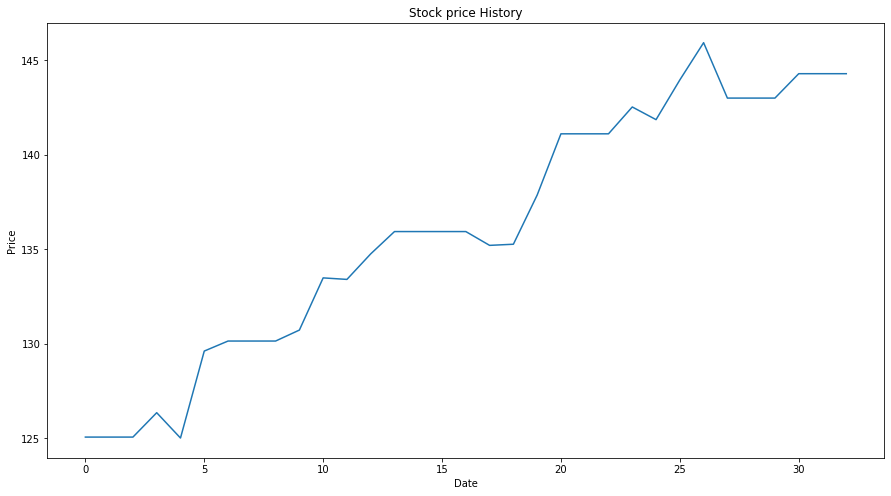

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Stock price History')
plt.plot(testing_Dataset['Closing Price'])
plt.xlabel('Date')
plt.ylabel('Price')


In [ ]:
import math
from sklearn.preprocessing import MinMaxScaler as MMS
col=['Closing Price','avg_sentiment']
closing_price=testing_Dataset[col]
values=closing_price.values
training_data_len=math.ceil(len(values)*1)

scaler = MMS(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data=scaled_data[0:training_data_len,:]
print(len(train_data),train_data.shape)

x_train =[]
y_train =[]

for i in range(10, len(train_data)):
  x_train.append(train_data[i-10:i,0])
  y_train.append(train_data[i,0])



x_train,y_train = np.array(x_train), np.array(y_train)
print("before reshaping",x_train.shape,y_train.shape)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print("after reshaping",x_train.shape)

33 (33, 1)
before reshaping (23, 10) (23,)
after reshaping (23, 10, 1)


In [ ]:
predictions = model1.predict(x_train)
predictions = scaler.inverse_transform(predictions)

1/1 [==============================] - 0s 27ms/step


In [ ]:
predictions.shape

(23, 1)